In [55]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [56]:
# Chargement des données 
df = pd.read_csv('gapminder_data_graphs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      3675 non-null   object 
 1   continent    3675 non-null   object 
 2   year         3675 non-null   int64  
 3   life_exp     3675 non-null   float64
 4   hdi_index    3563 non-null   float64
 5   co2_consump  3671 non-null   float64
 6   gdp          3633 non-null   float64
 7   services     3675 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 229.8+ KB


On voit qu'on a 3 colonnes nous permettant de classer les données (pays, continent, année) ainsi que 5 colonnes contenant des valeurs numériques (espérance de vie, Indice de Développement Humain, consommation de CO2, Produit Intérieur Brut et pourcentage de travailleurs dans le secteur tertiaire). 

# Data Cleaning

country          0
continent        0
year             0
life_exp         0
hdi_index      112
co2_consump      4
gdp             42
services         0
dtype: int64

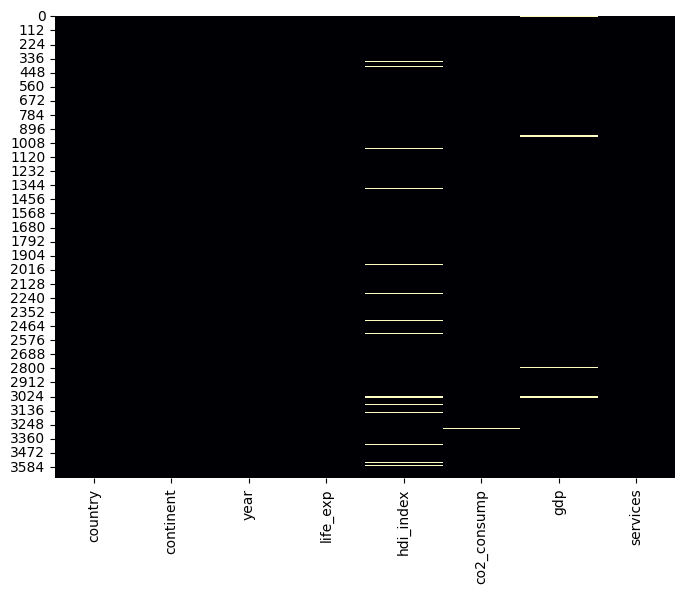

In [57]:
# On regarde les valeurs manquantes
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(), cbar=False , cmap = 'magma')

df.isnull().sum()

In [58]:
# Affichage des villes et années avec valeurs d'IDH manquantes
df[df['hdi_index'].isna()][['country', 'year']]

,country,year
63,Angola,1998
189,Bahamas,1998
190,Bahamas,1999
357,Bhutan,1998
358,Bhutan,1999
...,...,...
3572,Vanuatu,2000
3573,Vanuatu,2001
3574,Vanuatu,2002
3575,Vanuatu,2003


Il est cohérent que plusieurs valeurs pour l'indice de développement humain soient manquantes dans le cas de certains pays car il n'était probablement possible de les calculer à l'époque.

In [59]:
# Affichage des villes et années avec les valeurs de PIB manquantes
df[df['gdp'].isna()][['country', 'year']]

,country,year
0,Afghanistan,1998
1,Afghanistan,1999
2,Afghanistan,2000
3,Afghanistan,2001
945,Djibouti,1998
946,Djibouti,1999
947,Djibouti,2000
948,Djibouti,2001
949,Djibouti,2002
950,Djibouti,2003


Dans le même cas que précédemment, ces pays manquent de données pour le Produit Brut Intérieur car les données n'étaient probablement pas disponibles à l'époque.

In [60]:
# Affichage des villes et années avec les valeurs de consommation de CO2 manquantes
df[df['co2_consump'].isna()][['country', 'year']]

,country,year
3276,Timor-Leste,1998
3277,Timor-Leste,1999
3278,Timor-Leste,2000
3279,Timor-Leste,2001


Avant 2002, le Timor oriental était une province de l'Indonésie. Nous n'avons donc pas de données pour cette période.

In [61]:
# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace = True)

# Vérification
df.isnull().sum()

country        0
continent      0
year           0
life_exp       0
hdi_index      0
co2_consump    0
gdp            0
services       0
dtype: int64

In [62]:
# On regarde si on a des données dupliquées
print("Nombre de données dupliquées : " , df.duplicated().sum())

Nombre de données dupliquées :  0


# Analyse des données

On va commencer par regarder quelles colonnes numériques sont les plus corrélées entre elles.

## Analyse descriptive ( moyenne, médiane, écart-type, histogrammes, boxplots, graphiques de lignes)

In [63]:
# Moyenne des données par pays
df_without_year = df.drop('year', axis = 1)
df_mean = df_without_year.groupby('country').mean(numeric_only=True)
df_mean

,life_exp,hdi_index,co2_consump,gdp,services
country,,,,,
Afghanistan,59.911765,0.461059,0.194371,482.176471,31.135294
Albania,77.080952,0.731095,1.395476,3111.428571,37.328571
Algeria,73.571429,0.697095,3.241905,3739.047619,56.228571
Angola,58.830000,0.498700,1.052550,3517.500000,47.320000
Argentina,75.404762,0.811905,4.259524,12246.190476,76.057143
...,...,...,...,...,...
Vanuatu,64.564286,0.591000,0.463071,2798.571429,30.057143
Vietnam,73.071429,0.643095,1.315286,1539.904762,28.566667
Yemen,66.171429,0.478571,0.816429,2243.333333,53.690476


## Corrélation entre les colonnes

<Axes: >

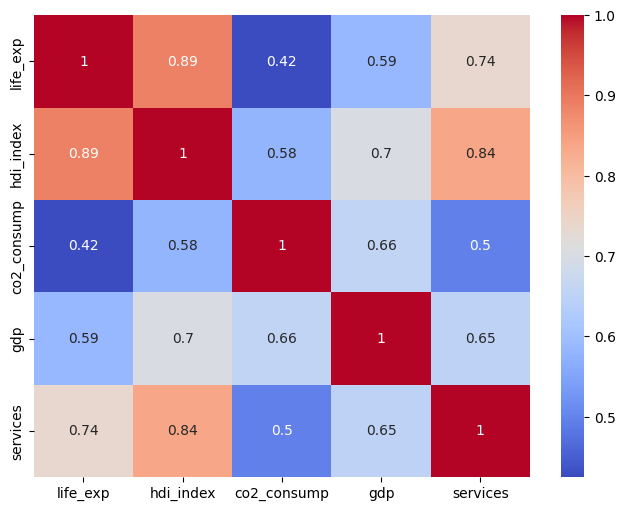

In [64]:
# On regarde les colonnes corrélées et on affiche dans une heatmap
df_num = df.select_dtypes(include = ['float64'])
correlation = df_num.corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

On remarque que les valeurs des colonnes sont plutôt liées mais on voit notamment une forte corrélation entre l'IDH et l'espérance de vie ce qui est logique car l'IDH est calculé en prenant en compte l'espérance de vie. On observe également une corrélation importante entre l'IDH et le pourcentage de travailleurs dans le secteur tertiaire qui peut s'expliquer par le fait que les pays avec un IDH élevé ont souvent une économie tertiaire développée comme avec le tourisme par exemple.

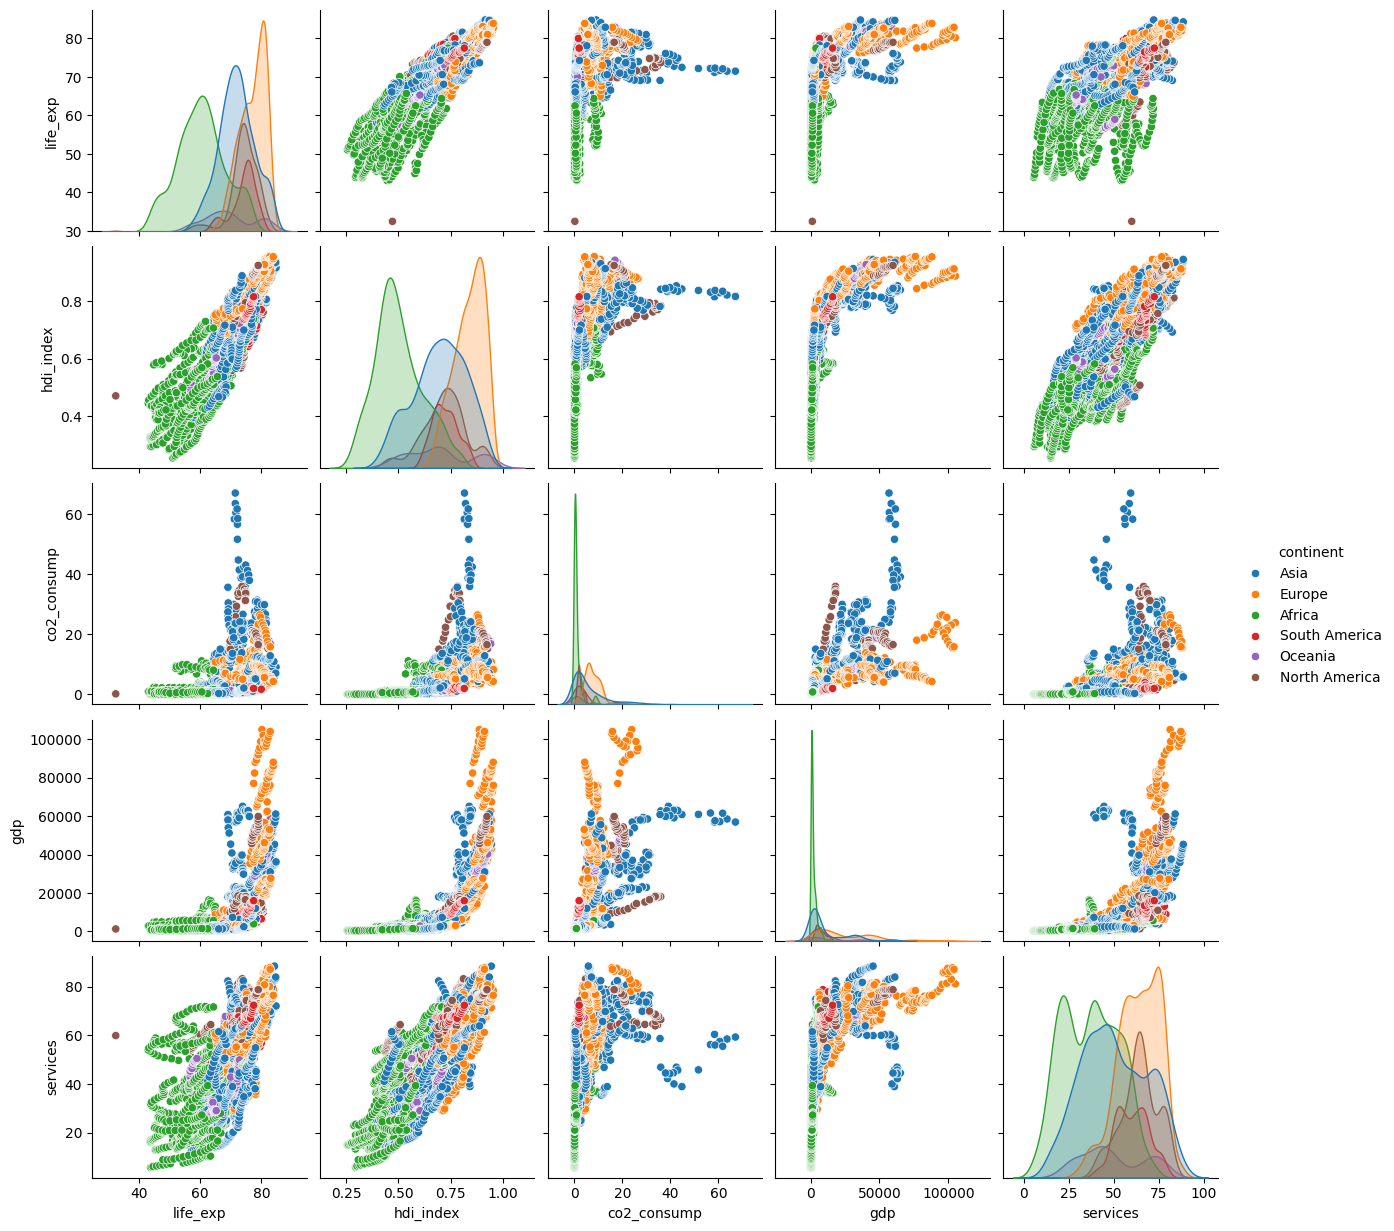

In [65]:
# Affichage des relations entre les colonnes
liste_colonnes = ["continent", "life_exp", "hdi_index", "co2_consump", "gdp", "services"]
sns.pairplot(data=df.loc[:, liste_colonnes], hue="continent")

Conclusion : On voit rien mais c'est fun

## Clustering

## Transformation de données

## Analyse temporelles et spatiales

In [66]:
#!python -m pip install ipykernel
# Création d'un graphique qui montre l'évolution de l'IDH et du % de services en fonction de l'année
df_complet = pd.read_csv('gapminder_data_graphs.csv')
graphique = px.scatter(df_complet, x = "hdi_index",  y = "services", color = "continent", animation_frame="year", range_x=[0,1], range_y= [0, 100])
graphique.show()